In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

##Load Data

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_loader)

6250

In [ ]:
train_dataset.targets[0]

6

In [ ]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def imshow(data, x):
  plt.figure(figsize=(10, 2))
  plt.imshow(data.data[x])
  plt.xlabel(class_names[data.targets[x]])


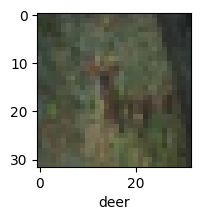

In [ ]:
imshow(train_dataset, 10)

## 2 Hiden Layer


In [ ]:
MLP = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32*32*3, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [ ]:
import tqdm
from IPython.display import clear_output
import os
def train(net: nn.Module, train_dataset ,lr: float, optimizer: str, nepochs: int):
  fig, ax = plt.subplots(1,1)
  losses = []

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=lr) if optimizer == "adam" else optim.SGD(net.parameters(), lr=lr, momentum=0.9)

  for ei in tqdm.trange(nepochs):
    for batch_data, batch_labels in train_loader:
        net.train()

        optimizer.zero_grad()
        outputs = net(batch_data)
        loss = criterion(outputs, batch_labels)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        clear_output(wait=True)
        print(f"Epoch [{ei+1}/{nepochs}], Loss: {loss.item():.4f}")


    # Vẽ đồ thị loss
    ax.clear()
    ax.plot(losses)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title('Training Loss')
    fig.canvas.draw()
    fig.canvas.flush_events()

  return net

Epoch [10/10], Loss: 1.1409


100%|██████████| 10/10 [15:24<00:00, 92.46s/it]


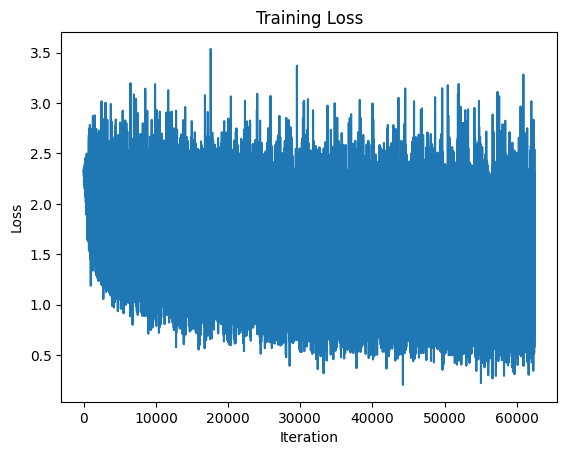

In [ ]:
mlp = train(MLP, train_loader, 0.001, "sgd", 10)

In [ ]:
def predict(net: nn.Module, test):
  net.eval()
  with torch.no_grad():
    outputs = net(test)
    outputs = torch.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs).item()
  return predicted

In [ ]:
predict(mlp, train_dataset[0][0].unsqueeze(0))

6

In [ ]:
# prompt: caculater accuracy of test_loader

def accuracy_data(net: nn.Module, test_loader):
  net.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for batch_data, batch_labels in test_loader:
      outputs = net(batch_data)
      _, predicted = torch.max(outputs.data, 1)
      total += batch_labels.size(0)
      correct += (predicted == batch_labels).sum().item()

  return (correct / total)

In [ ]:
accuracy(mlp, test_loader)

0.4997

In [ ]:
accuracy(mlp, train_loader)

0.5502

## 1 Hiden Layer

In [ ]:
MLP_one_Hiden = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32*32*3, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
)

Epoch [10/10], Loss: 1.2360


100%|██████████| 10/10 [19:45<00:00, 118.53s/it]


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=10, bias=True)
)

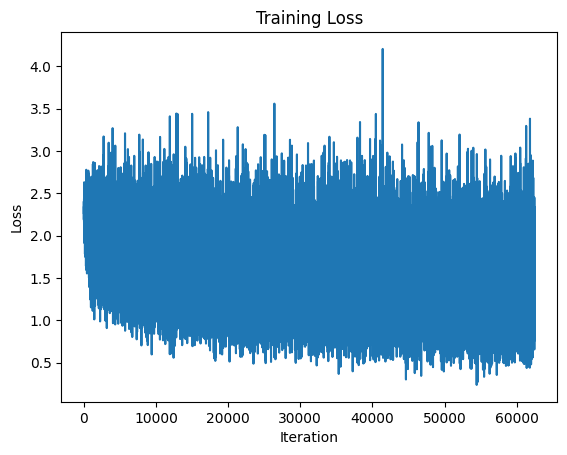

In [ ]:
train(MLP_one_Hiden, train_loader, 0.001, "sgd", 10)

In [ ]:
accuracy(MLP_one_Hiden, test_loader)

0.4987

In [ ]:
accuracy(MLP_one_Hiden, train_loader)

0.54396

## CNN model

In [ ]:
CNN = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),

    nn.Linear(64 * 8 * 8, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

Epoch [10/10], Loss: 0.2515


100%|██████████| 10/10 [37:45<00:00, 226.53s/it]


Sequential(
  (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=4096, out_features=512, bias=True)
  (8): ReLU()
  (9): Linear(in_features=512, out_features=256, bias=True)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=10, bias=True)
)

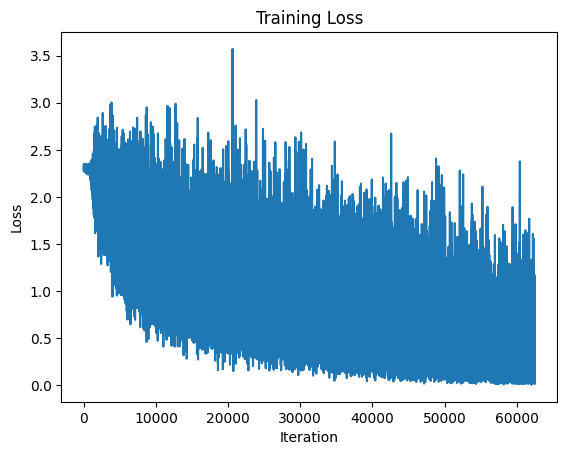

In [ ]:
train(CNN, train_loader, 0.001, "sgd", 10)

In [ ]:
accuracy(CNN, test_loader)

0.7168

In [ ]:
accuracy(CNN, train_loader)

0.92012

In [ ]:
class_names[predict(CNN, train_dataset[10][0].unsqueeze(0))]

'deer'